# Classification and Regression Trees


## Import required packages

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


## Riding Mowers dataset

Classes: Nonowner, Owner


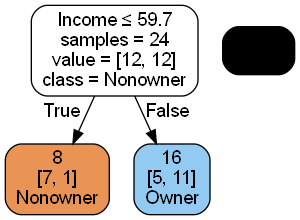

In [3]:
mower_df = pd.read_csv('RidingMowers.csv')

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

In [ ]:
classificationSummary(mower_df['Ownership'], classTree.predict(mower_df.drop(columns=['Ownership'])))

Grow tree fully (by dropping max_depth option)

In [4]:
#Your turn: Develop another tree and obtain classification Summary

## Using Banking dataset

In [5]:
#Load the dataset

#Drop ID and Zipcode columns

#Separate X and y variables

#Partition

#Develop trees



## Calculate accuracy using classification summary

In [6]:
#Calculate both for training data as well as validation data

In [ ]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

## Cross Validation

In [6]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.983', '0.972', '0.992', '0.985', '0.992']
Accuracy: 0.985 (+/- 0.015)
Accuracy: 0.985 (+/- 0.007)


## Smaller classification tree using DecisionTreeClassifier() control parameters.

Small Classification Tree with Control Parameters


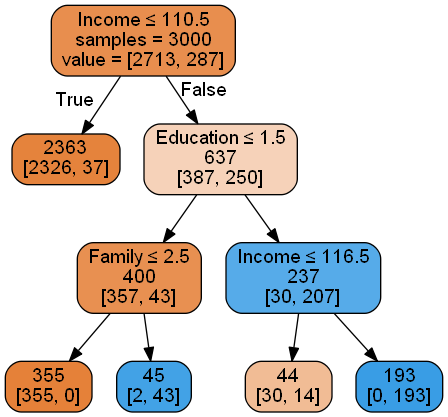

In [50]:
# Create a smaller classification tree for training partition using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [7]:
#Use ClassificationSummary for the small tree

In [ ]:
# Indetify and display number of nodes in the tree.

## Grid search

In [9]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


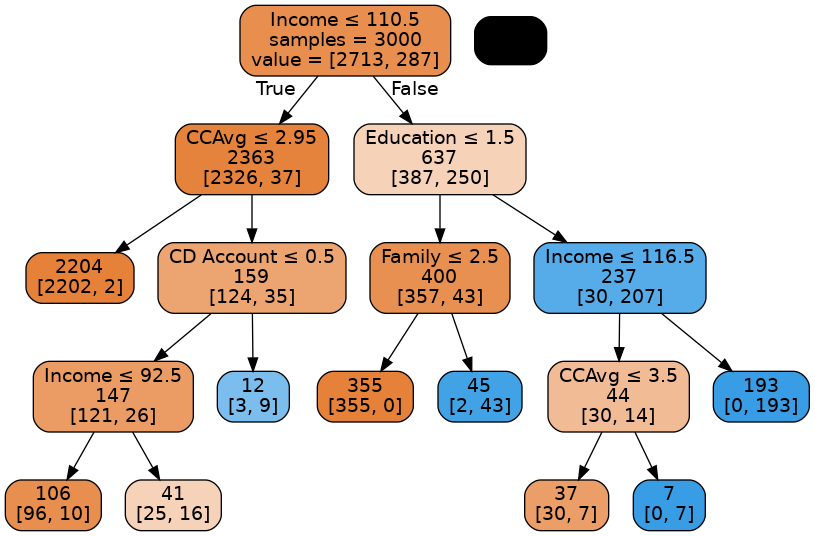

In [10]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [11]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


In [ ]:
# Indetify and display number of nodes in the tree.

## Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

In [27]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


Confusion matrix and metrics

In [28]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Boosted Trees

In [ ]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

In [36]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168
